In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


# 1. Pobranie danych 

In [99]:
#Pobieranie danych 
mesurment_data = pd.read_csv('./transcoding_mesurment.tsv', delimiter='\t')

# 2. Analiza danych 

In [92]:
#Wyświetlanie wszystkich kolumn 
pd.options.display.max_columns = None
mesurment_data.head(10)

,id,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456
5,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,1920,1080,102072,6.320
6,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,15.0,176,144,23132,0.728
7,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,15.0,320,240,25164,0.944
8,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,15.0,480,360,29236,1.476
9,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,15.0,640,480,34312,1.964


In [86]:
#Iformacje o danych 
mesurment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 28 columns):
id               68784 non-null object
duration         68784 non-null float64
codec_mpeg4      68784 non-null int64
codec_h264       68784 non-null int64
codec_vp8        68784 non-null int64
codec_flv        68784 non-null int64
width            68784 non-null int64
height           68784 non-null int64
bitrate          68784 non-null int64
framerate        68784 non-null float64
i                68784 non-null int64
p                68784 non-null int64
b                68784 non-null int64
frames           68784 non-null int64
i_size           68784 non-null int64
p_size           68784 non-null int64
b_size           68784 non-null int64
size             68784 non-null int64
o_codec_mpeg4    68784 non-null int64
o_codec_vp8      68784 non-null int64
o_codec_flv      68784 non-null int64
o_codec_h264     68784 non-null int64
o_bitrate        68784 non-null int64
o_framerate 

In [9]:
#Wymiary tablicy 
print(mesurment_data.shape)

(68784, 28)


In [10]:
#liczba wymiarów 
mesurment_data.ndim

2

In [90]:
#Atrybuty 
print(mesurment_data.columns.values)

['id' 'duration' 'codec' 'width' 'height' 'bitrate' 'framerate' 'i' 'p'
 'b' 'frames' 'i_size' 'p_size' 'b_size' 'size' 'o_codec' 'o_bitrate'
 'o_framerate' 'o_width' 'o_height' 'umem' 'utime']


Informacje o atrybutach: 
    
- id = Youtube videp id 
- duration = duration of video
- bitrate bitrate(video) = video bitrate
- height = height of video in pixles
- width = width of video in pixles
- frame rate = actual video frame rate
- frame rate(est.) = estimated video frame rate
- codec = coding standard used for the video
- category = YouTube video category
- url = direct link to video (has expiration date)
- i = number of i frames in the video
- p = number of p frames in the video
- b = number of b frames in the video
- frames = number of frames in video
- i_size = total size in byte of i videos
- p_size = total size in byte of p videos
- b_size = total size in byte of b videos
- size = total size of video
- o_codec = output codec used for transcoding
- o_bitrate = output bitrate used for transcoding
- o_framerate = output framerate used for transcoding
- o_width = output width in pixel used for transcoding
- o_height = output height used in pixel for transcoding
- umem = total codec allocated memory for transcoding
- utime = total transcoding time for transcoding

In [12]:
mesurment_data_display = mesurment_data.head()
#Jeden przypadek 
mesurment_data_display.iloc[1]

id               04t6-jw9czg
duration             130.357
codec_mpeg4                1
codec_h264                 0
codec_vp8                  0
codec_flv                  0
width                    176
height                   144
bitrate                54590
framerate                 12
i                         27
p                       1537
b                          0
frames                  1564
i_size                 64483
p_size                825054
b_size                     0
size                  889537
o_codec_mpeg4              1
o_codec_vp8                0
o_codec_flv                0
o_codec_h264               0
o_bitrate              56000
o_framerate               12
o_width                  320
o_height                 240
umem                   25164
utime                   0.98
Name: 1, dtype: object

In [15]:
#typy
mesurment_data.dtypes

id                object
duration         float64
codec_mpeg4        int64
codec_h264         int64
codec_vp8          int64
codec_flv          int64
width              int64
height             int64
bitrate            int64
framerate        float64
i                  int64
p                  int64
b                  int64
frames             int64
i_size             int64
p_size             int64
b_size             int64
size               int64
o_codec_mpeg4      int64
o_codec_vp8        int64
o_codec_flv        int64
o_codec_h264       int64
o_bitrate          int64
o_framerate      float64
o_width            int64
o_height           int64
umem               int64
utime            float64
dtype: object

In [93]:
#statystyki 
mesurment_data.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


In [94]:
dir(mesurment_data)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 

# 4. Zmiany po przeprowadzaniu analizy 
- typy

In [95]:
#sprawdzanie danych w codec i o_codec
print("Classes in data:", np.unique(mesurment_data['codec']))
print("Classes in data:", np.unique(mesurment_data['o_codec']))


Classes in data: ['flv' 'h264' 'mpeg4' 'vp8']
Classes in data: ['flv' 'h264' 'mpeg4' 'vp8']


In [100]:
#rozdzial kolumn
ohe = ce.OneHotEncoder(cols= ['codec', 'o_codec'], return_df=True, use_cat_names=True, handle_unknown=0)
mesurment_data = ohe.fit_transform(mesurment_data)

In [105]:
#nowe wymairy tablicy 
mesurment_data.shape

(68784, 28)

In [104]:
#Przeglad nowych kolumn 
print(mesurment_data.columns.values)

['id' 'duration' 'codec_mpeg4' 'codec_h264' 'codec_vp8' 'codec_flv'
 'width' 'height' 'bitrate' 'framerate' 'i' 'p' 'b' 'frames' 'i_size'
 'p_size' 'b_size' 'size' 'o_codec_mpeg4' 'o_codec_vp8' 'o_codec_flv'
 'o_codec_h264' 'o_bitrate' 'o_framerate' 'o_width' 'o_height' 'umem'
 'utime']


In [101]:
#Przeglad typów 
mesurment_data.dtypes

id                object
duration         float64
codec_mpeg4        int64
codec_h264         int64
codec_vp8          int64
codec_flv          int64
width              int64
height             int64
bitrate            int64
framerate        float64
i                  int64
p                  int64
b                  int64
frames             int64
i_size             int64
p_size             int64
b_size             int64
size               int64
o_codec_mpeg4      int64
o_codec_vp8        int64
o_codec_flv        int64
o_codec_h264       int64
o_bitrate          int64
o_framerate      float64
o_width            int64
o_height           int64
umem               int64
utime            float64
dtype: object

In [102]:
#Przeglad nowego rozłożenia danych 
mesurment_data.head(10)

,id,duration,codec_mpeg4,codec_h264,codec_vp8,codec_flv,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec_mpeg4,o_codec_vp8,o_codec_flv,o_codec_h264,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,1280,720,58528,3.456
5,04t6-jw9czg,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,1920,1080,102072,6.320
6,04t6-jw9czg,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,15.0,176,144,23132,0.728
7,04t6-jw9czg,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,15.0,320,240,25164,0.944
8,04t6-jw9czg,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,15.0,480,360,29236,1.476
9,04t6-jw9czg,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,15.0,640,480,34312,1.964


# 5. Podział danych 

In [106]:
#Podział na data i target
data = mesurment_data.iloc[1:,1:-1]
target = mesurment_data.iloc[1:,-1]

In [107]:
data_ = np.array(data)
target_ = np.array(target)

print(data_.shape)
print(target_.shape)

(68783, 26)
(68783,)


C:\Users\HP.LAPTOP-HJDI7J51\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP.LAPTOP-HJDI7J51\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


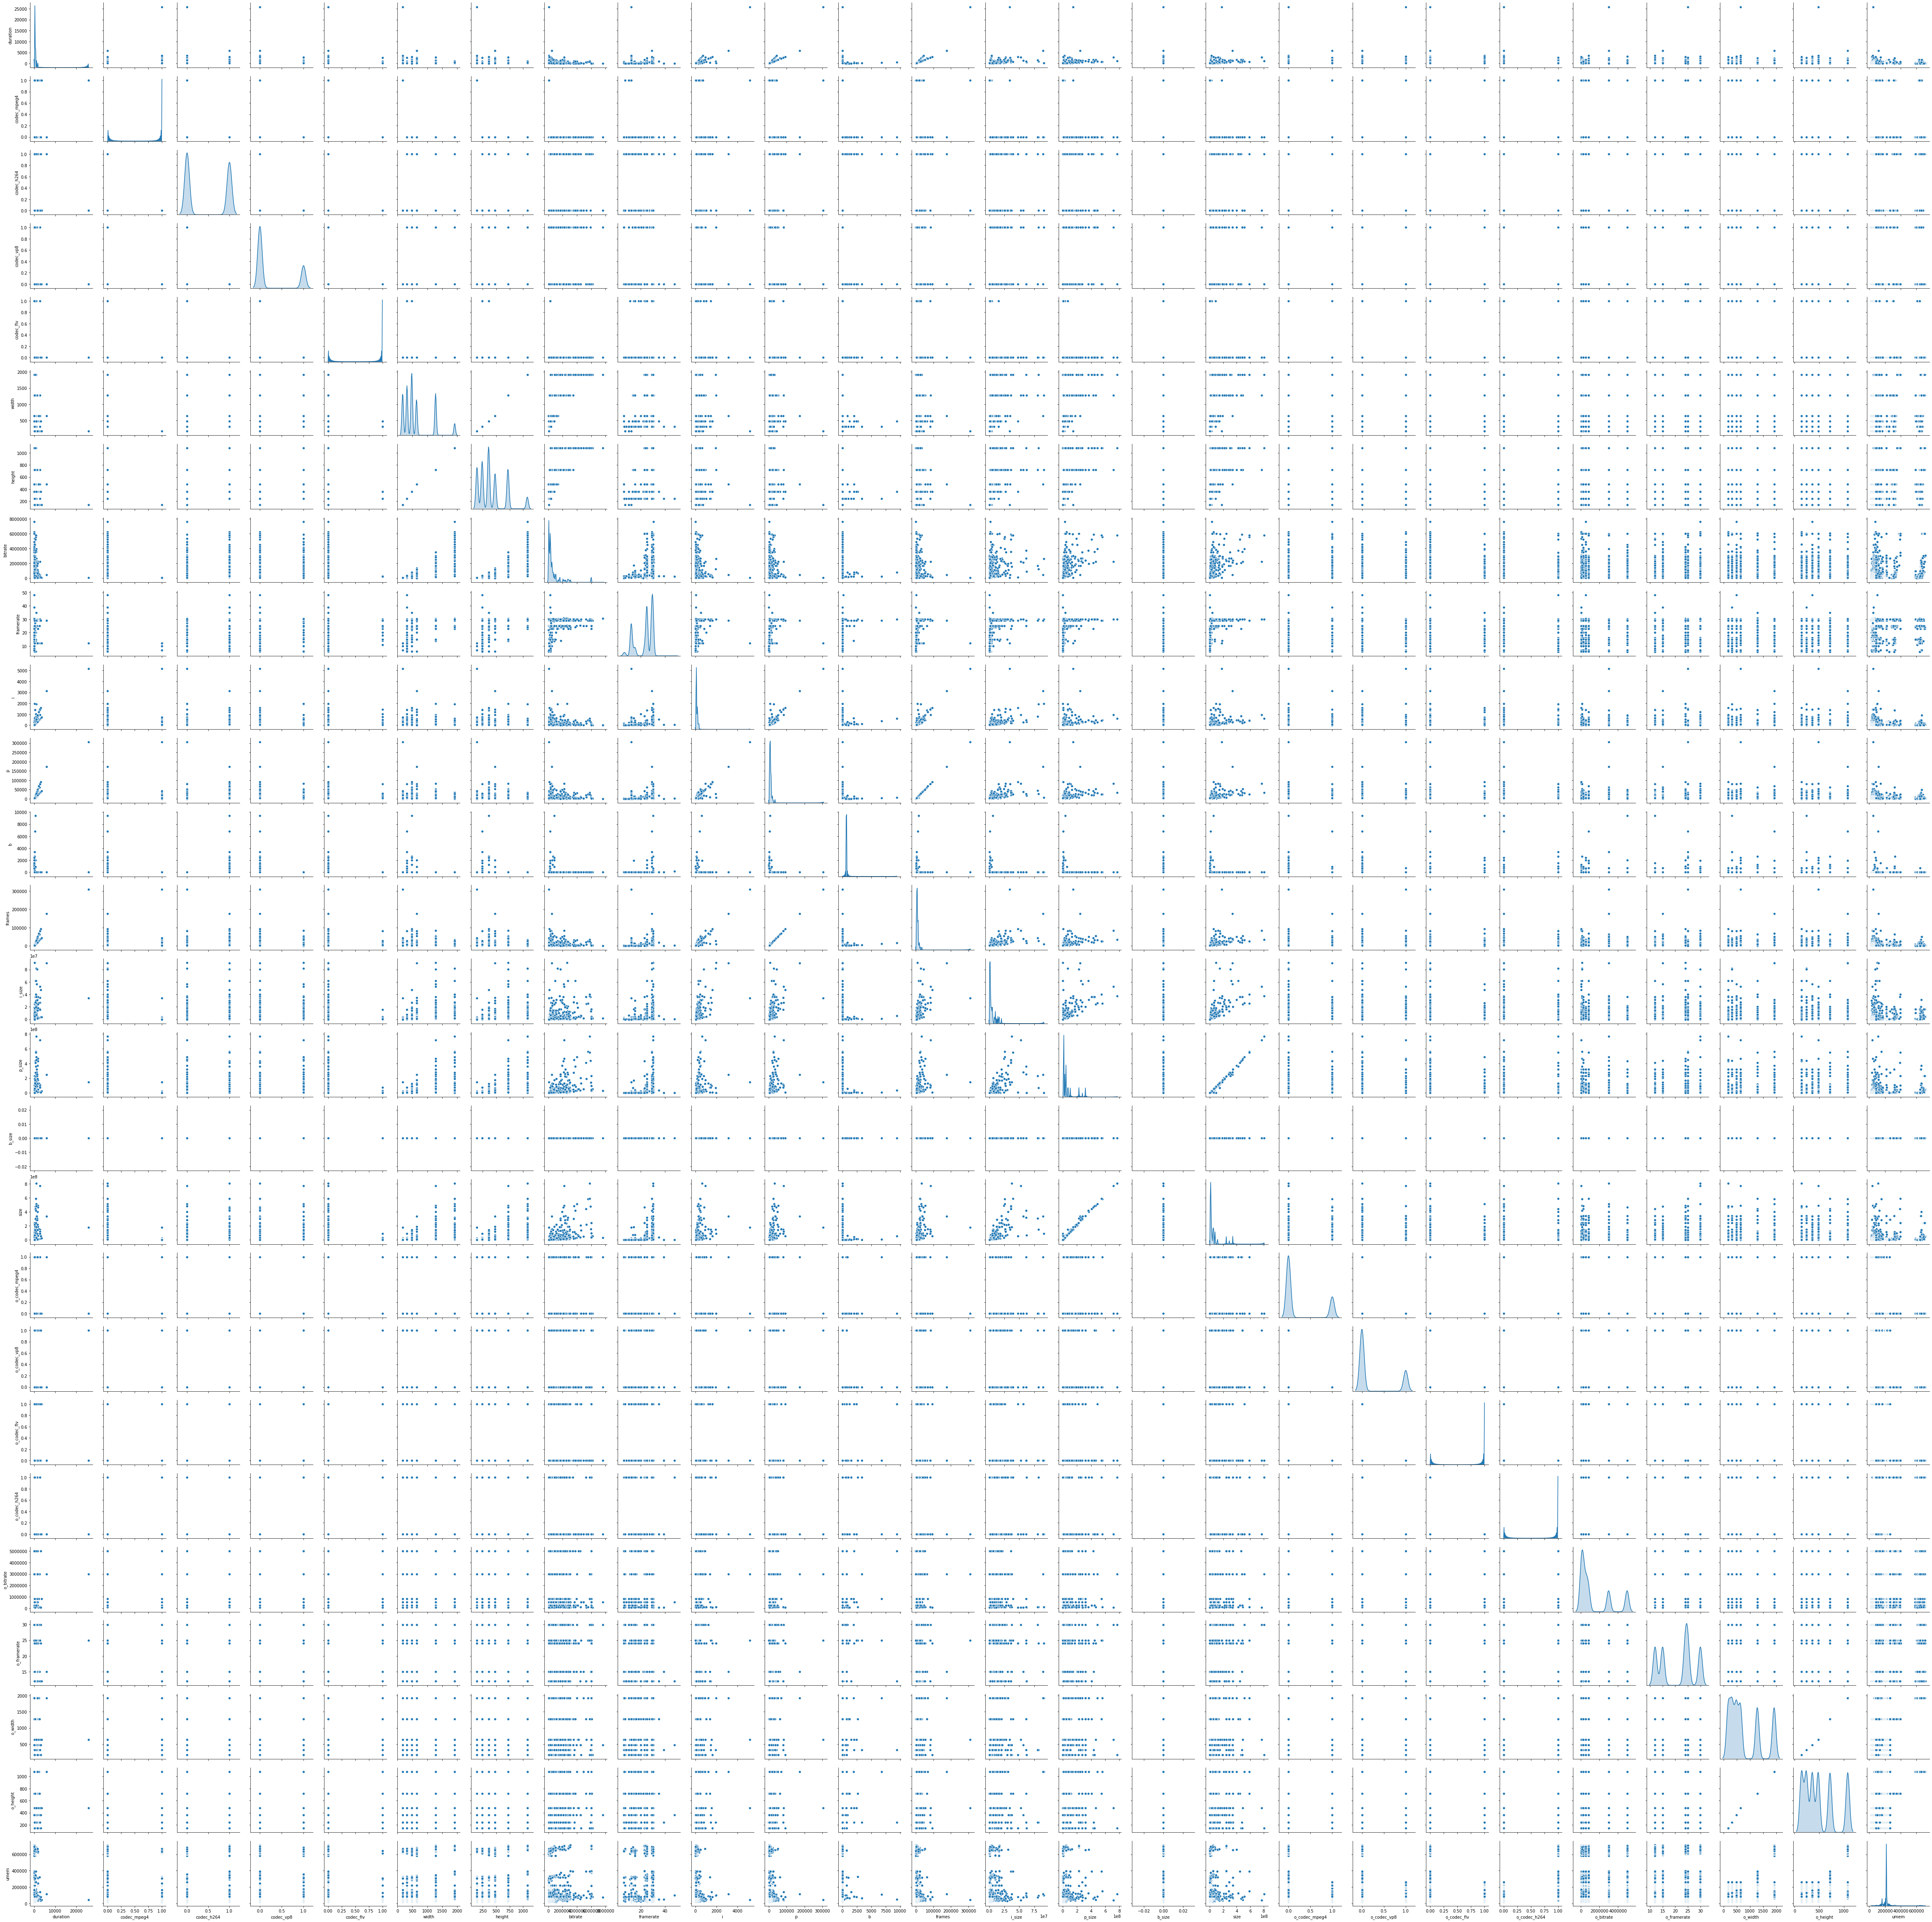

In [129]:
%matplotlib inline
sns.pairplot(data, diag_kind="kde")

# 6. Standaryzacja 

In [128]:
target_

array([0.98 , 1.216, 1.692, ..., 0.752, 5.444, 3.076])

In [127]:
data_

array([[1.3035667e+02, 1.0000000e+00, 0.0000000e+00, ..., 3.2000000e+02,
        2.4000000e+02, 2.5164000e+04],
       [1.3035667e+02, 1.0000000e+00, 0.0000000e+00, ..., 4.8000000e+02,
        3.6000000e+02, 2.9228000e+04],
       [1.3035667e+02, 1.0000000e+00, 0.0000000e+00, ..., 6.4000000e+02,
        4.8000000e+02, 3.4316000e+04],
       ...,
       [2.4968000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.7600000e+02,
        1.4400000e+02, 8.8708000e+04],
       [1.8362334e+02, 0.0000000e+00, 1.0000000e+00, ..., 3.2000000e+02,
        2.4000000e+02, 8.8724000e+04],
       [2.9461334e+02, 1.0000000e+00, 0.0000000e+00, ..., 1.7600000e+02,
        1.4400000e+02, 8.8736000e+04]])

In [110]:
#srednia 
np.mean(data_, axis=0)

array([2.86416190e+02, 1.74621636e-01, 4.58616228e-01, 2.67318960e-01,
       9.94431764e-02, 6.24940698e+02, 4.12576131e+02, 6.93710792e+05,
       2.32414840e+01, 1.00869386e+02, 6.53176483e+03, 9.14798715e+00,
       6.64178220e+03, 2.83902704e+06, 2.21808798e+07, 0.00000000e+00,
       2.50232932e+07, 2.51370251e-01, 2.51181251e-01, 2.49116788e-01,
       2.48331710e-01, 1.39505542e+06, 2.11909953e+01, 8.02345463e+02,
       5.03830772e+02, 2.28227709e+05])

In [111]:
#odchylenie standartowe 
np.std(data_, axis=0)

array([2.87257034e+02, 3.79643149e-01, 4.98284440e-01, 4.42560203e-01,
       2.99256129e-01, 4.63165906e+02, 2.40613293e+02, 1.09562484e+06,
       7.22472081e+00, 8.47643228e+01, 6.07584190e+03, 9.25161705e+01,
       6.15331199e+03, 4.32512366e+06, 5.09729963e+07, 0.00000000e+00,
       5.41439372e+07, 4.33800931e-01, 4.33692553e-01, 4.32501577e-01,
       4.32045220e-01, 1.74934406e+06, 6.66861071e+00, 6.09955122e+02,
       3.15967459e+02, 9.74277209e+04])

In [120]:
#Trzeba przeprowadzić standaryzacje, aby danych rozkład miał średnią wartość równą 0 i odchylenie standardowe równe 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_)
k = scaler.transform(data)

In [121]:
#Po standaryzacji 
scaled_data 

array([[-0.54327484,  2.17408998, -0.92039043, ..., -0.79078845,
        -0.83499349, -2.08424981],
       [-0.54327484,  2.17408998, -0.92039043, ..., -0.52847407,
        -0.45520755, -2.04253684],
       [-0.54327484,  2.17408998, -0.92039043, ..., -0.26615969,
        -0.0754216 , -1.99031351],
       ...,
       [-0.12788613, -0.45996256, -0.92039043, ..., -1.02687139,
        -1.13882225, -1.43203297],
       [-0.35784276, -0.45996256,  1.08649544, ..., -0.79078845,
        -0.83499349, -1.43186875],
       [ 0.02853594,  2.17408998, -0.92039043, ..., -1.02687139,
        -1.13882225, -1.43174558]])

In [122]:
#srednia kolumn po standaryzacji 
np.std(scaled_data, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [124]:
sd=scaled_data.astype(int)
np.mean(sd, axis=0)

array([ 1.71452248e-01,  3.49243272e-01,  4.58616228e-01,  2.67318960e-01,
        2.98329529e-01,  2.67406190e-01,  9.27845543e-02,  2.05719436e-01,
       -2.97907913e-01,  1.44570606e-01,  1.73531250e-01,  9.12870913e-02,
        1.73545789e-01,  2.27774305e-01,  1.77950947e-01,  0.00000000e+00,
        1.78212640e-01,  2.51370251e-01,  2.51181251e-01,  2.49116788e-01,
        2.48331710e-01,  2.85826440e-01, -5.81539043e-05, -2.03538665e-04,
       -2.03538665e-04,  1.22326738e-01])

In [28]:
#Graficzny obraz przed standaryzacja
data['umem'].agg(['min','max','mean','std'])

min      22604.000000
max     711824.000000
mean    228227.708707
std      97428.429095
Name: umem, dtype: float64

In [125]:
data.head()

,duration,codec_mpeg4,codec_h264,codec_vp8,codec_flv,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec_mpeg4,o_codec_vp8,o_codec_flv,o_codec_h264,o_bitrate,o_framerate,o_width,o_height,umem
1,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,320,240,25164
2,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,480,360,29228
3,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,640,480,34316
4,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,1280,720,58528
5,130.35667,1,0,0,0,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,1,0,0,0,56000,12.0,1920,1080,102072


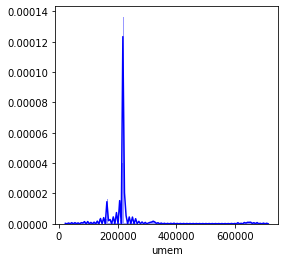

In [29]:
plt.figure(figsize=(4,4))
sns.distplot(data['umem'].dropna(),kde=True,bins=170, color='blue')

In [30]:
#Po standaryzacji 
kf = pd.DataFrame(k)
kf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-0.543275,2.17409,-0.92039,-0.604028,-0.332301,-0.969287,-1.116215,-0.583339,-1.555975,-0.871468,-0.82207,-0.09888,-0.825211,-0.641495,-0.418964,0.0,-0.445733,1.725745,-0.579169,-0.57599,-0.574782,-0.765461,-1.378247,-0.790788,-0.834993,-2.084250
1,-0.543275,2.17409,-0.92039,-0.604028,-0.332301,-0.969287,-1.116215,-0.583339,-1.555975,-0.871468,-0.82207,-0.09888,-0.825211,-0.641495,-0.418964,0.0,-0.445733,1.725745,-0.579169,-0.57599,-0.574782,-0.765461,-1.378247,-0.528474,-0.455208,-2.042537
2,-0.543275,2.17409,-0.92039,-0.604028,-0.332301,-0.969287,-1.116215,-0.583339,-1.555975,-0.871468,-0.82207,-0.09888,-0.825211,-0.641495,-0.418964,0.0,-0.445733,1.725745,-0.579169,-0.57599,-0.574782,-0.765461,-1.378247,-0.266160,-0.075422,-1.990314
3,-0.543275,2.17409,-0.92039,-0.604028,-0.332301,-0.969287,-1.116215,-0.583339,-1.555975,-0.871468,-0.82207,-0.09888,-0.825211,-0.641495,-0.418964,0.0,-0.445733,1.725745,-0.579169,-0.57599,-0.574782,-0.765461,-1.378247,0.783098,0.684150,-1.741801
4,-0.543275,2.17409,-0.92039,-0.604028,-0.332301,-0.969287,-1.116215,-0.583339,-1.555975,-0.871468,-0.82207,-0.09888,-0.825211,-0.641495,-0.418964,0.0,-0.445733,1.725745,-0.579169,-0.57599,-0.574782,-0.765461,-1.378247,1.832355,1.823508,-1.294865


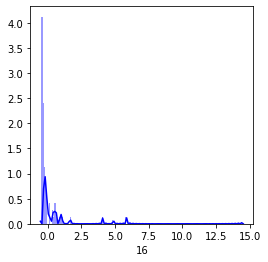

In [32]:
plt.figure(figsize=(4,4))
sns.distplot(kf[16].dropna(),kde=True,bins=170, color='blue')

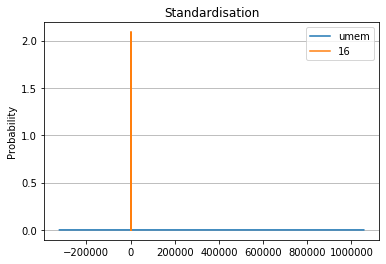

In [33]:
#Porownanie 
fig, ax = plt.subplots()
data['umem'].plot.kde(ax=ax, legend=True, title='Standardisation')
kf[16].plot.kde(ax=ax, legend=True)
ax.set_ylabel('Probability')
ax.grid(axis='y')

# 7. Podział na zbior uczący i testujący 

In [34]:
#domyślny podział na zbior uczacy i testujacy 
mesurment_train_data, mesurment_test_data, \
mesurment_train_target, mesurment_test_target = \
train_test_split(scaled_data,target_, test_size=0.1, random_state=101)

In [35]:
#zbiór uczący 
print("Training dataset:")
print("mesurment_train_data:", mesurment_train_data.shape)
print("mesurment_train_target:", mesurment_train_target.shape)

Training dataset:
mesurment_train_data: (61904, 26)
mesurment_train_target: (61904,)


In [36]:
#zbiór trenujący 
print("Testing dataset:")
print("mesurment_test_data:", mesurment_test_data.shape)
print("mesurment_test_target:", mesurment_test_target.shape)

Testing dataset:
mesurment_test_data: (6879, 26)
mesurment_test_target: (6879,)


# 8. Trenowanie Modelu 

In [126]:
# Model Regresji Liniowej 
lr = LinearRegression(normalize=True)
lr.fit(mesurment_train_data, mesurment_train_target)

#Błąd średniokwadratowy
precission = mean_squared_error(mesurment_test_target, lr.predict(mesurment_test_data))
print("Mean squared error of a learned model: {0:0.2f}".format(precission))

#Trafność zbioru 
score = lr.score(mesurment_test_data, mesurment_test_target)
print("Linear Regression variance score: %.2f" % score) #r2_score

Mean squared error of a learned model: 105.14
Linear Regression variance score: 0.65


In [38]:
lr.coef_

array([ 3.07968812e-01,  2.70533536e+12,  3.55077267e+12,  3.15368201e+12,
        2.13249783e+12,  4.26077899e+00, -4.06174139e+00,  1.82266198e+00,
        5.71445577e-01,  1.62025138e+11,  1.16138381e+13,  1.76842624e+11,
       -1.17619205e+13, -5.76874274e+00, -5.91242160e+01,  2.68096331e+14,
        6.31844274e+01,  4.09522982e+12,  4.09420668e+12,  4.08296346e+12,
        4.07865529e+12,  2.46067918e+00,  1.63445948e+00,  4.48730510e+00,
        1.27278404e+00,  6.80500519e+00])

In [39]:
#Cross-validation
scores = cross_val_score(lr, scaled_data, target_, cv=4)
print(scores)

[ 5.93766895e-01  6.66932523e-01  6.54129970e-01 -1.09502893e+24]


In [155]:
#Sprawdzanie poprawnosci dla przykladu z id = 4
id=4
linear_regression_prediction = lr.predict(mesurment_test_data[id,:].reshape(1,-1))

In [156]:
#Przewidywanie 
print("Model predicted for mesurment {0} value {1}".format(id, linear_regression_prediction))

Model predicted for mesurment 4 value [11.47812925]


In [157]:
#Aktualna wartość
print("Real value for mesurment \"{0}\" is {1}".format(id, mesurment_test_target[id]))

Real value for mesurment "4" is 12.433


In [163]:
#Sprawdzanie poprawnosci dla przykladu z id = 10
id=10
linear_regression_prediction = lr.predict(mesurment_test_data[id,:].reshape(1,-1))

#Przewidywanie 
print("Model predicted for mesurment {0} value {1}".format(id, linear_regression_prediction))

#Aktualna wartość
print("Real value for mesurment \"{0}\" is {1}".format(id, mesurment_test_target[id]))

Model predicted for mesurment 10 value [2.59482847]
Real value for mesurment "10" is 3.628


In [133]:
#Przewidywania 
linear_regression_predictions = lr.predict(mesurment_test_data)
print(linear_regression_predictions)

[ 2.82041441 11.38096128 33.14072691 ... 12.02744566 55.06650816
 -6.28896059]


In [44]:
# Regresja wielomianowa stopnia 2
pt = PolynomialFeatures(2, interaction_only=True)

In [45]:
#zbior uczacy 
mesurment_train_target.shape

(61904,)

In [46]:
#transformacja zbioru uczącego 
mesurment_train_poly = pt.fit_transform(mesurment_train_data)
mesurment_train_poly.shape

(61904, 352)

In [144]:
#zbior testujacy 
mesurment_test_target.shape

(6879,)

In [143]:
#transformacja zbioru trenujacego  
mesurment_test_poly = pt.fit_transform(mesurment_test_data)
mesurment_test_poly.shape

(6879, 352)

In [50]:
# Trenowanie danych z regresja wielominową 
lri = LinearRegression(normalize=True)
lri.fit(mesurment_train_poly, mesurment_train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
#Błąd średniokwadratowy
print("Mean squared error of a linear moderl using polynomial features: %.2f" % 
      mean_squared_error(mesurment_test_target, lri.predict(mesurment_test_poly)))

#Trafność 
score = lri.score(mesurment_test_poly, mesurment_test_target) #r2_score
print("Linear Regression variance score using polynomial features: %.2f" % score)


Mean squared error of a linear moderl using polynomial features: 83.82
Linear Regression variance score using polynomial features: 0.72


In [164]:
#Sprawdzanie poprawnosci dla przykladu z id = 4 z modelem regresji wielomianowym 
id=4
lrp = lri.predict(mesurment_test_poly[id,:].reshape(1,-1))

#Przewidywanie 
print("Model predicted for mesurment {0} value {1}".format(id, lrp))

#Aktualna wartość 
print("Real value for mesurment \"{0}\" is {1}".format(id, mesurment_test_target[id]))

Model predicted for mesurment 4 value [8.18212891]
Real value for mesurment "4" is 12.433


In [165]:
#Sprawdzanie poprawnosci dla przykladu z id = 10 z modelem regresji wielomianowym 
id=10
lrp = lri.predict(mesurment_test_poly[id,:].reshape(1,-1))

#Przewidywanie 
print("Model predicted for mesurment {0} value {1}".format(id, lrp))

#Aktualna wartość 
print("Real value for mesurment \"{0}\" is {1}".format(id, mesurment_test_target[id]))

Model predicted for mesurment 10 value [1.53173828]
Real value for mesurment "10" is 3.628


In [145]:
#Lasso 
lasso_regression = Lasso(alpha=0.05)
lasso_regression.fit(mesurment_train_poly, mesurment_train_target)

In [147]:
score = lasso_regression.score(mesurment_test_poly, mesurment_test_target)
#Błąd średniokwadratowy
print("Mean squared error of a linear moderl using polynomial features: %.2f" % 
      mean_squared_error(mesurment_test_target, lasso_regression.predict(mesurment_test_poly)))

#Trafność 
print("Lasso regression variance score: %.2f" % score)

Mean squared error of a linear moderl using polynomial features: 37.37
Lasso regression variance score: 0.88


In [153]:
#Sprawdzanie poprawnosci dla przykladu z id = 4 z modelem regresji lasso
id=4
lss = lasso_regression.predict(mesurment_test_poly[id,:].reshape(1,-1))

#Przewidywanie 
print("Model predicted for mesurment {0} value {1}".format(id, lss))

#Aktualna wartość 
print("Real value for mesurment \"{0}\" is {1}".format(id, mesurment_test_target[id]))

Model predicted for mesurment 4 value [10.47109003]
Real value for mesurment "4" is 12.433


In [162]:
#Sprawdzanie poprawnosci dla przykladu z id = 10 z modelem regresji lasso
id=10
lss = lasso_regression.predict(mesurment_test_poly[id,:].reshape(1,-1))

#Przewidywanie 
print("Model predicted for mesurment {0} value {1}".format(id, lss))

#Aktualna wartość 
print("Real value for mesurment \"{0}\" is {1}".format(id, mesurment_test_target[id]))

Model predicted for mesurment 10 value [3.78715104]
Real value for mesurment "10" is 3.628


In [160]:
#Cross-validation  
scores = cross_val_score(lri, mesurment_train_poly, mesurment_train_target, cv=3)
print(scores)

[-1.91961772e+16 -4.46268707e+17 -5.97217568e+17]
